--- Loading Brain & Data ---
✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

🏠 House ID: 269000070
🛏️ Specs: 4 Bed / 3.0 Bath / 2400 Sqft
--------------------
💰 REAL Price:      $608,000
🤖 AI Prediction:   $486,927
📉 Difference:      $-121,073


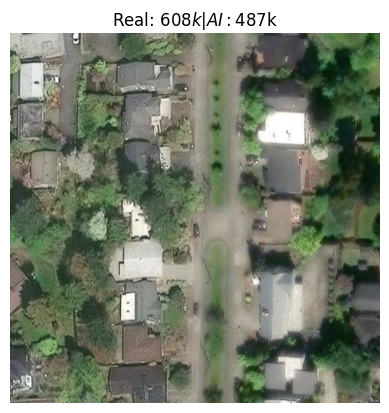

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# ================= CONFIGURATION =================
MODEL_FILE = "house_price_model.h5"
DATA_FILE = "cleaned_dataset.csv"
IMAGE_DIR = "data/house_images"
IMG_SIZE = 64
# =================================================

def main():
    print("--- Loading Brain & Data ---")
    
    # 1. Load the Model
    if not os.path.exists(MODEL_FILE):
        print("❌ Error: You need to run train_ai.py first!")
        return

    # FIX: We add compile=False to avoid the 'mae' error
    # We only need the 'compiled' part if we want to continue training.
    # For just predicting, compile=False is safer and faster.
    try:
        model = load_model(MODEL_FILE, compile=False)
        print("✅ Model loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return
    
    # 2. Load and Prepare Data (Needed to scale the numbers correctly)
    df = pd.read_csv(DATA_FILE)
    
    feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat', 'long']
    # We must scale the numbers exactly like we did in training
    stats = df[feature_cols].values
    scaler = MinMaxScaler()
    scaler.fit(stats)
    
    # 3. Pick a Random House
    random_index = np.random.randint(0, len(df))
    house = df.iloc[random_index]
    
    # 4. Prepare the Image
    img_path = os.path.join(IMAGE_DIR, f"image_{house['id']}.jpg")
    
    if not os.path.exists(img_path):
        print(f"⚠️ Image for ID {house['id']} not found. Trying another house...")
        return

    original_img = Image.open(img_path).convert('RGB') # Ensure it works even for black/white images
    
    # Resize for AI
    ai_img = original_img.resize((IMG_SIZE, IMG_SIZE))
    ai_img_array = np.array(ai_img) / 255.0
    ai_img_array = np.expand_dims(ai_img_array, axis=0) # Add batch dimension
    
    # 5. Prepare the Stats
    house_stats = house[feature_cols].values.reshape(1, -1)
    house_stats_scaled = scaler.transform(house_stats)
    
    # 6. ASK THE AI
    predicted_price = model.predict([ai_img_array, house_stats_scaled])[0][0]
    real_price = house['price']
    
    # 7. Show Result
    diff = predicted_price - real_price
    print("\n" + "="*40)
    print(f"🏠 House ID: {house['id']}")
    print(f"🛏️ Specs: {house['bedrooms']} Bed / {house['bathrooms']} Bath / {house['sqft_living']} Sqft")
    print("-" * 20)
    print(f"💰 REAL Price:      ${real_price:,.0f}")
    print(f"🤖 AI Prediction:   ${predicted_price:,.0f}")
    print(f"📉 Difference:      ${diff:,.0f}")
    print("="*40)
    
    # Show the image
    plt.imshow(original_img)
    plt.title(f"Real: ${real_price/1000:.0f}k | AI: ${predicted_price/1000:.0f}k")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()

C:\Users\sumit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


--- Loading Brain & Data ---
✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step

🏠 House ID: 2026049067
🛏️ Specs: 3 Bed / 2.0 Bath / 1470 Sqft
--------------------
💰 REAL Price:      $480,000
🤖 AI Prediction:   $484,371
📉 Difference:      $4,371 (0.9%)


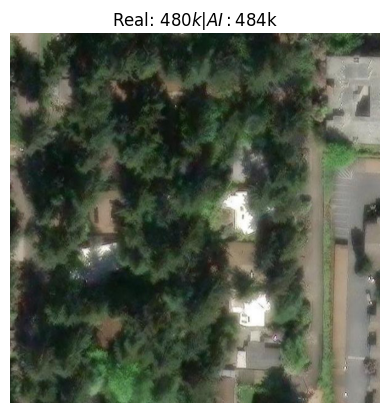

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# ================= CONFIGURATION =================
# UPGRADE: Point to the new model
MODEL_FILE = "house_price_model_v2.h5" 
DATA_FILE = "cleaned_dataset.csv"
IMAGE_DIR = "data/house_images"

# UPGRADE: This must match the size you trained with (128)
IMG_SIZE = 128  
# =================================================

def main():
    print("--- Loading Brain & Data ---")
    
    # 1. Load the Model
    if not os.path.exists(MODEL_FILE):
        print(f"❌ Error: {MODEL_FILE} not found! Did you run train_ai_v2.py?")
        return

    try:
        # compile=False avoids the 'mae' error and is faster for prediction
        model = load_model(MODEL_FILE, compile=False)
        print("✅ Model loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return
    
    # 2. Load and Prepare Data (Needed to scale the numbers correctly)
    df = pd.read_csv(DATA_FILE)
    
    feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'lat', 'long']
    # We must scale the numbers exactly like we did in training
    stats = df[feature_cols].values
    scaler = MinMaxScaler()
    scaler.fit(stats)
    
    # 3. Pick a Random House
    random_index = np.random.randint(0, len(df))
    house = df.iloc[random_index]
    
    # 4. Prepare the Image
    img_path = os.path.join(IMAGE_DIR, f"image_{house['id']}.jpg")
    
    if not os.path.exists(img_path):
        print(f"⚠️ Image for ID {house['id']} not found. Trying another house...")
        return

    original_img = Image.open(img_path).convert('RGB') 
    
    # Resize for AI (NOW USING 128x128)
    ai_img = original_img.resize((IMG_SIZE, IMG_SIZE))
    ai_img_array = np.array(ai_img) / 255.0
    ai_img_array = np.expand_dims(ai_img_array, axis=0) # Add batch dimension
    
    # 5. Prepare the Stats
    house_stats = house[feature_cols].values.reshape(1, -1)
    house_stats_scaled = scaler.transform(house_stats)
    
    # 6. ASK THE AI
    predicted_price = model.predict([ai_img_array, house_stats_scaled])[0][0]
    real_price = house['price']
    
    # 7. Show Result
    diff = predicted_price - real_price
    abs_diff = abs(diff)
    error_percent = (abs_diff / real_price) * 100
    
    print("\n" + "="*40)
    print(f"🏠 House ID: {house['id']}")
    print(f"🛏️ Specs: {house['bedrooms']} Bed / {house['bathrooms']} Bath / {house['sqft_living']} Sqft")
    print("-" * 20)
    print(f"💰 REAL Price:      ${real_price:,.0f}")
    print(f"🤖 AI Prediction:   ${predicted_price:,.0f}")
    print(f"📉 Difference:      ${diff:,.0f} ({error_percent:.1f}%)")
    print("="*40)
    
    # Show the image
    plt.imshow(original_img)
    plt.title(f"Real: ${real_price/1000:.0f}k | AI: ${predicted_price/1000:.0f}k")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()